In [36]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from losses import *
from plots import *
from EDA import *
from cross_validation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [37]:
DATA_TRAIN_PATH = "../data/train.csv"
data_y, data_set, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)

In [38]:
# Fixing the seed
seed = 8

### Split and classify data

In [39]:
# Classification of the output
y_0, y_1, y_2, y_3 = y_classification(data_y, data_set)

In [40]:
#EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_set)

In [41]:
# Remove from graoh analysis
class_0 = remove_feature(class_0, [2, 5, 8, 11, 13])
class_1 = remove_feature(class_1, [4, 10, 11, 13, 14, 15, 18])
class_2 = remove_feature(class_2, [2, 5, 8, 11, 13])
class_3 = remove_feature(class_3, [5, 7, 10, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 26])

In [42]:
# Set the "spliter" value correponding to the part dedicated for train
spliter = 0.8

# Split into a train and a test set
train_0, y_tr_0, test_0, y_te_0 = train_test_separator(y_0, class_0)
train_1, y_tr_1, test_1, y_te_1 = train_test_separator(y_1, class_1)
train_2, y_tr_2, test_2, y_te_2 = train_test_separator(y_2, class_2)
train_3, y_tr_3, test_3, y_te_3 = train_test_separator(y_3, class_3)

# Tutrial for cross validation

***

In [59]:
# Create a "paramters" object
param = Parameters()

# Set up some parameters such as 'max_iter', 'gamma', etc...
param.set_max_iter(100)
param.set_mini_batch_size(100)
param.set_gamma(1e-1) # useless for the cross-validation but it's an example

# Define the method and the loss function you want
param.set_method(least_squares_GD)
mse = MSE()
param.set_loss_fct(mse)

# Select the parameter you want to test ('gamma' or 'lambda' or both)
param.set_to_test(['gamma'])

# Define the range of your parameter that will be test
param.set_gamma_range(np.logspace(-10,0,30))

# Tell if you want visualization of your result or not
param.set_viz(True)

# Select the class of your data set: 0, 1, 2 or 3
class_ind = 0

Test error: 23.66629966970273
Best gamma: 0.45203536563602403
Test error: 35.92339437709569
Best gamma: 0.09236708571873885
Test error: 48.287841191067
Best gamma: 0.2043359717856948
Test error: 29.986462093862816
Best gamma: 0.2043359717856948


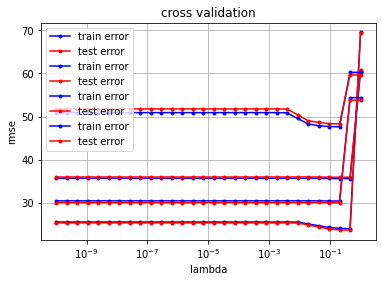

In [60]:
for idx in range(4):
    opt_param = test_function(data_y, data_set, param, idx)

# See some histograms

***

#### Only on class 0

In [ ]:
classs = class_0
yy = y_0

In [ ]:
ind_y_neg = np.array(np.where(yy == 0)[0])
ind_y_pos = np.array(np.where(yy == 1)[0])

In [ ]:
for col in range(16):
    plt.figure(figsize=(8,5))
    plt.hist(classs[ind_y_neg, col], bins=100, histtype = 'step', color = 'red', density=True)
    plt.hist(classs[ind_y_pos, col], bins=100, histtype = 'step', density=True)
    plt.title('Histogram of feature 0')
    plt.show()

***
***

# Submission example

In [25]:
param = Parameters()
param.set_method(ridge_regression)
param.set_lambda(1e-10)

In [26]:
# Train our model and get the response weight and its loss
param.set_init_w(np.zeros(class_0.shape[1]))
mse_0, w_0 = param.method(y_0, class_0, param)

In [27]:
# Train our model and get the response weight and its loss
param.set_init_w(np.zeros(class_1.shape[1]))
mse_1, w_1 = param.method(y_1, class_1, param)

In [28]:
# Train our model and get the response weight and its loss
param.set_init_w(np.zeros(class_2.shape[1]))
mse_2, w_2 = param.method(y_2, class_2, param)

In [29]:
# Train our model and get the response weight and its loss
param.set_init_w(np.zeros(class_3.shape[1]))
mse_3, w_3 = param.method(y_3, class_3, param)

In [30]:
print(w_0.shape)
print(class_0.shape)

(10,)
(99913, 10)


In [31]:
# Get the predictions on the train set
y_pred_0 = predict_labels(w_0, class_0)
y_pred_1 = predict_labels(w_1, class_1)
y_pred_2 = predict_labels(w_2, class_2)
y_pred_3 = predict_labels(w_3, class_3)

In [32]:
y_pred_train = rebuild_y(y_pred_0, y_pred_1, y_pred_2, y_pred_3, data_set)
counting_errors(y_pred_train, data_y)

(82735, 33.094)

In [33]:
DATA_TEST_PATH = "../data/test.csv"
_, data_test_set, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
# EDA for each class
class_0, class_1, class_2, class_3 = EDA_class(data_test_set)

# Get the predictions on the train set
y_pred_0 = predict_labels(w_0, class_0)
y_pred_1 = predict_labels(w_1, class_1)
y_pred_2 = predict_labels(w_2, class_2)
y_pred_3 = predict_labels(w_3, class_3)

y_pred = rebuild_y(y_pred_0, y_pred_1, y_pred_2, y_pred_3, data_test_set)

In [ ]:
OUTPUT_PATH = '../data/test_prediction_submission.csv' # TODO: fill in desired name of output file for submission
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)